## Informasi Mahasiswa

Nama: Muhammad Farhan

NPM: 2108107010050


# Dataset

Source dataset: https://www.kaggle.com/datasets/erdemtaha/cancer-data/data

**Atribut pada dataset** 

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.

**Label pada dataset**

diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant)

## Studi Kasus

Membangun model untuk melakukan klasifikasi pada cancer yang diderita pasien. Dalam studi kasus ini kita akan melakukan klasifikasi untuk mengelompokkan tumor jinak dan tumor ganar

# Library Yang Digunakan

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Membaca dataset

In [32]:
import pandas as pd

dataset_path = 'dataset/Cancer_Data.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
print(df.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Preprocessing Data

In [33]:
# Melihat informasi pada dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# List of columns to drop
columns_to_drop = ['Unnamed: 32', 'id']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)


Membuang column id dan Unnamed: 32

In [35]:
# Cek statistik deskriptif dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
#check duplicate data
df.duplicated().sum()

0

In [38]:
#mapping dataset Jika tumor ganas akan diubah menjadi 1 dan tumor jinak akan diubah menjadi 0
label_mapping = {'B': 0, 'M': 1}

# Apply the mapping
df['diagnosis'] = df['diagnosis'].map(label_mapping)

print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

Melakukan Mapping terhadap column diagnosis dengan mengubah nilai B menjadi 0 dan M menjadi 1. Hal ini bertujuan agar memudahkan untuk melakukan klasifikasi dengan menggunakan metode SVM

# Exploratory Data Analysis

In [39]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

Ini merupakan korelasi antar atribut dapat kita liat atribut concave points_worst sangat mempengaruhi diagnosis dengan nilai 0.793566. Dikarenakan banyaknya atribut sehingga membuat saya tidak melakukan plotting dalam melihat korelasi.

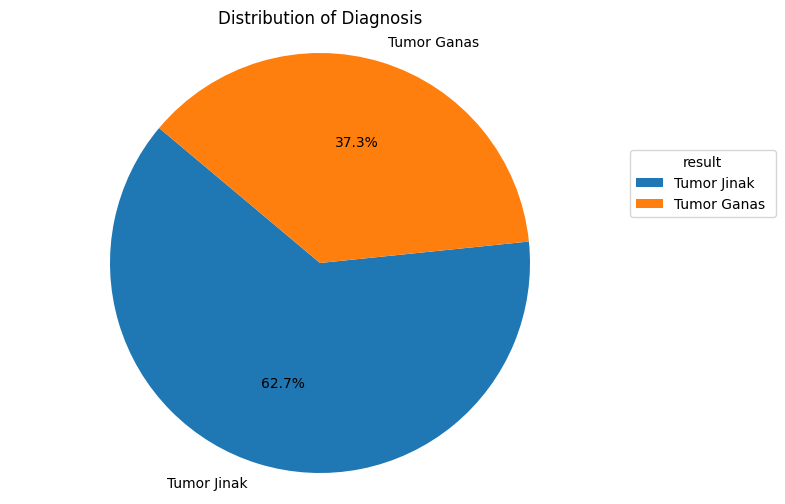

In [40]:
# Group by the "diagnosis" attribute and count occurrences
diagnosis_counts = df['diagnosis'].value_counts()

# Define labels with explanations
labels = ['Tumor Jinak ', 'Tumor Ganas ']
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.legend(title='result',loc=(1,0.6))
plt.title('Distribution of Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dapay dilihat disini distribusi dari tumor ganas dan tumor jinak yakni 37.3:62.7

# Split dataset dan Normalisasi Data

In [41]:
y = df["diagnosis"]
X = df[['radius_mean', 'texture_mean', 'concave points_mean', 'compactness_mean']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
X

,radius_mean,texture_mean,concave points_mean,compactness_mean
0,17.99,10.38,0.14710,0.27760
1,20.57,17.77,0.07017,0.07864
2,19.69,21.25,0.12790,0.15990
3,11.42,20.38,0.10520,0.28390
4,20.29,14.34,0.10430,0.13280
...,...,...,...,...
564,21.56,22.39,0.13890,0.11590
565,20.13,28.25,0.09791,0.10340
566,16.60,28.08,0.05302,0.10230
567,20.60,29.33,0.15200,0.27700


## Membangun Model


In [43]:
# Membuat dan melatih model SVC
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train, y_train)

# Membuat prediksi
pred = svm.predict(X_test)

# Menghitung akurasi
acs = accuracy_score(y_test, pred)
print("Akurasi:", acs)

# Membuat matriks evaluasi
cm = confusion_matrix(y_test, pred)
print("Matriks Evaluasi:\n", cm)


# Generate a detailed classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Akurasi: 0.956140350877193
Matriks Evaluasi:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Merupakan hasil dari prediksi dengan menggunakan semua fitur yang ada didalam tabel dan menggunakan kernel linear

In [44]:
# membangun model SVM dengan kernel rbf dan variabel 1 dan 2
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X_train[:, [0, 1]], y_train)

SVC(C=10, gamma=1)

In [45]:
# Model testing and prediction
y_pred_rbf = svm_rbf.predict(X_test[:, [0, 1]])  
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [46]:
# membangun model SVM dengan kernel linear dan variabel 1 dan 2
svm_linear = SVC(kernel='linear', C=10, gamma=1)
svm_linear.fit(X_train[:, [0, 1]], y_train)

SVC(C=10, gamma=1, kernel='linear')

In [47]:
# Model testing and prediction
y_pred_linear = svm_linear.predict(X_test[:, [0, 1]])  
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



# Model ANN



In [48]:
# Initialize the ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# set optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               640       
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 99713 (389.50 KB)
Trainable params: 99713 (389.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# make custom callback function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai lebih dari 95%!")
            self.model.stop_training = True
            
callbacks = myCallback()


In [50]:
# Train the model
model.history = model.fit(X_train, y_train, 
                          epochs=100, batch_size=32, 
                          validation_split=0.2, 
                          callbacks=[callbacks], verbose=1)

Epoch 1/100


12/12 [==============================] - 2s 18ms/step - loss: 0.3466 - accuracy: 0.8764 - val_loss: 0.1979 - val_accuracy: 0.9011
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1889 - accuracy: 0.9258 - val_loss: 0.1663 - val_accuracy: 0.9451
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1659 - accuracy: 0.9368 - val_loss: 0.1527 - val_accuracy: 0.9451
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.9478 - val_loss: 0.1696 - val_accuracy: 0.9231
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1298 - accuracy: 0.9423 - val_loss: 0.1484 - val_accuracy: 0.9341
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1284 - accuracy: 0.9451 - val_loss: 0.1536 - val_accuracy: 0.9451
Epoch 7/100
 1/12 [=>............................] - ETA: 0s - loss: 0.0538 - accuracy: 1.0000
Akurasi telah mencapai lebih dari 95%!
12/12 [========================

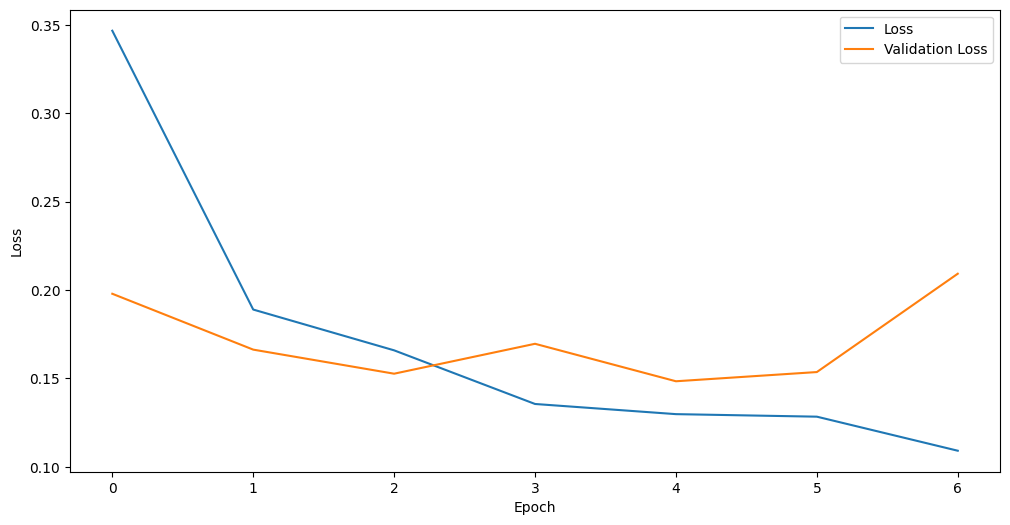

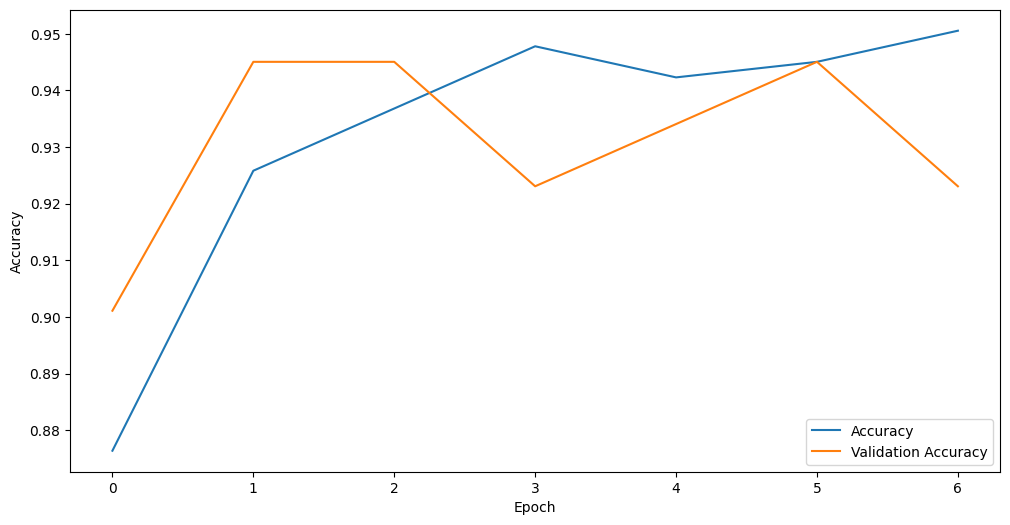

In [51]:
# loss plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [52]:
# Predict the target variable
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Loss: 0.16
Accuracy: 94.74%


In [53]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


4/4 [==============================] - 0s 2ms/step


In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import tensorflow as tf

# Prediksi dengan model TensorFlow
y_pred_tf = model.predict(X_test)  # Gantilah 'model' dengan model TensorFlow Anda
y_pred_tf = (y_pred_tf > 0.5).astype(int)  # Konversi probabilitas menjadi label biner (0 atau 1)

# Metrik evaluasi untuk model TensorFlow
akurasi_tf = accuracy_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
presisi_tf = precision_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)


y_pred_linear = svm_linear.predict(X_test[:, [0, 1]])

# Menghitung dan mencetak nilai akurasi
accuracy = accuracy_score(y_test, y_pred_linear)
# print(f"Accuracy: {accuracy:.4f}")

# Menghitung dan mencetak nilai presisi
precision = precision_score(y_test, y_pred_linear)
# print(f"Precision: {precision:.4f}")

# Menghitung dan mencetak nilai recall
recall = recall_score(y_test, y_pred_linear)
# print(f"Recall: {recall:.4f}")
# Menampilkan metrik evaluasi secara berdampingan
print("                SVM RBF               |        TensorFlow Model      ")
print("----------------------------------------------------------------------")
print(f"Akurasi       : {accuracy*100:.2f}%                |      {akurasi_tf*100:.2f}%                  |")
print(f"Recall        : {recall*100:.2f}%                |      {recall_tf*100:.2f}%                  |")
print(f"Presisi       : {precision*100:.2f}%                |      {presisi_tf*100:.2f}%                  |")



4/4 [==============================] - 0s 2ms/step
                SVM RBF               |        TensorFlow Model      
----------------------------------------------------------------------
Akurasi       : 90.35%                |      94.74%                  |
Recall        : 83.72%                |      95.35%                  |
Presisi       : 90.00%                |      91.11%                  |
